<a href="https://colab.research.google.com/github/Happday-bot/Quantum-Computing-Projects/blob/main/Leftover_concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

import qiskit as qk
print(qk.__version__)   # We check version just know the version we work in

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=80e0449dae3ec48cdf968024e1ed243eca01944beb81b8686459a462e477c8b5
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 98.2 MB/s eta 0:00:00
2.0.1


In [ ]:
!pip install qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 279.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 10.8 MB/s eta 0:00:00


In [ ]:
import qiskit as qk
import numpy as np
import inspect
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector
from qiskit.quantum_info import Operator
from qiskit.visualization import plot_histogram
from qiskit.visualization import array_to_latex
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.visualization import plot_error_map, plot_gate_map, plot_coupling_map
from qiskit_aer import AerSimulator
from qiskit.circuit.library import UGate
from numpy import pi, random
import math

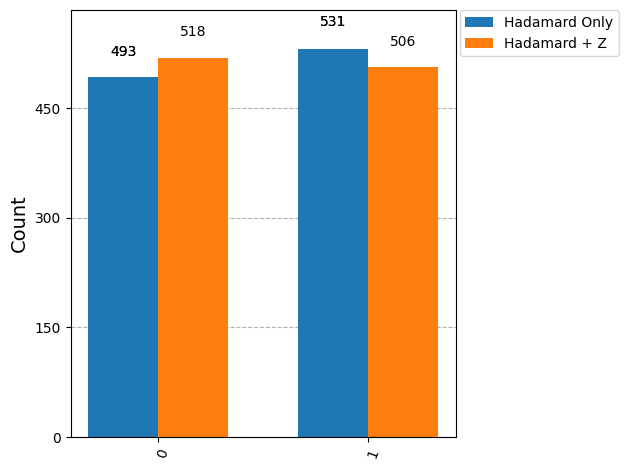

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Define two circuits (identical for simplicity)
qc1 = QuantumCircuit(1, 1)
qc1.h(0)
qc1.measure(0, 0)

qc2 = QuantumCircuit(1, 1)
qc2.h(0)
qc2.z(0)  # add Z gate to make the circuit differ
qc2.measure(0, 0)

# Execute both
backend = Aer.get_backend('qasm_simulator')
result1 = backend.run(qc1,shots = 1024).result()
result2 = backend.run(qc1,shots = 1024).result()

# Get counts
counts1 = result1.get_counts()
counts2 = result2.get_counts()

# Plot both histograms on the same plot with legend
plot_histogram([counts1, counts2], legend=['Hadamard Only', 'Hadamard + Z'])


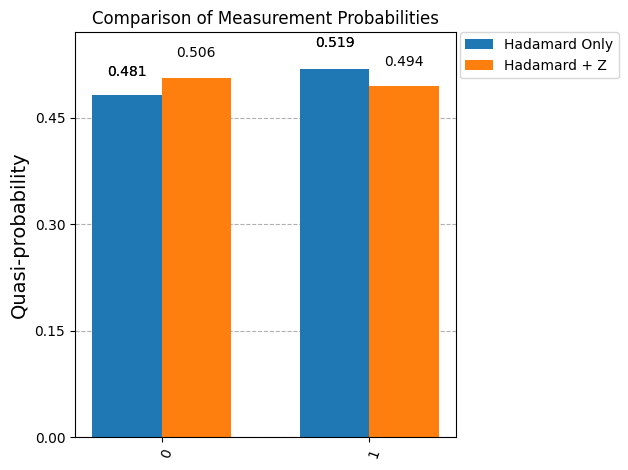

In [ ]:
# Convert counts to probabilities
def counts_to_probs(counts, shots = 1024):
    return {key: val / shots for key, val in counts.items()}

probs1 = counts_to_probs(counts1)
probs2 = counts_to_probs(counts2)

# Plot as probability histogram
plot_histogram([probs1, probs2], legend=['Hadamard Only', 'Hadamard + Z'], title="Comparison of Measurement Probabilities")


In [ ]:
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector

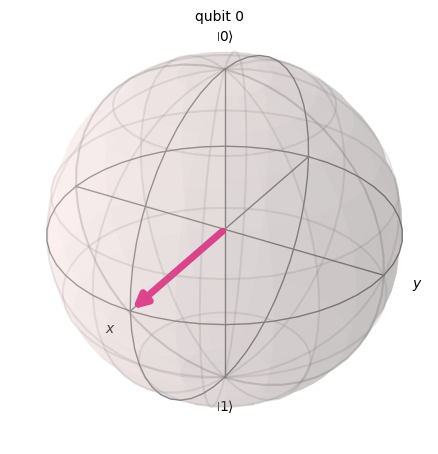

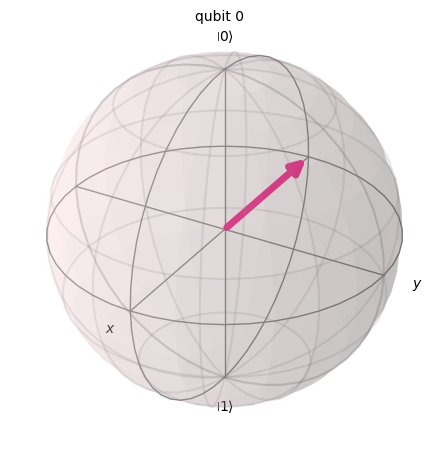

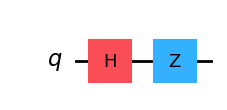

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
display(plot_bloch_multivector(qc))
qc.z(0)
display(plot_bloch_multivector(qc))
qc.draw("mpl")

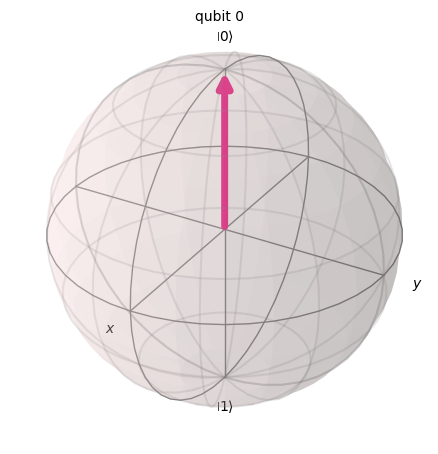

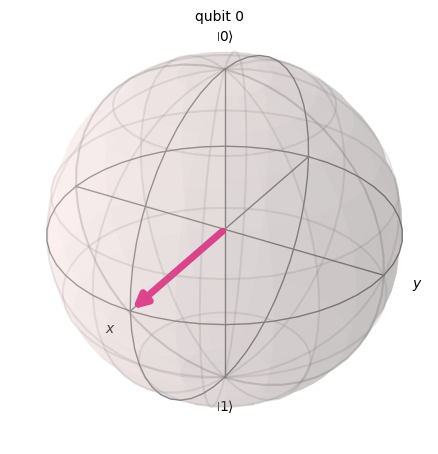

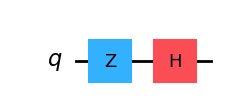

In [ ]:
qc = QuantumCircuit(1)
qc.z(0)
display(plot_bloch_multivector(qc))
qc.h(0)
display(plot_bloch_multivector(qc))
qc.draw("mpl")

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='ae91887603e9ccb23b762cb7c23c50e2652b4a88a7715f3150b87daa53f5787d39a9cf489715b66dec1a3dc1d24eb4d55378b3dd682790f9b7c891bf3a6757e3'
)

<ipython-input-10-3e694306dc01>:3: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud" and "local" will be the only valid channels. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService(


In [ ]:
backend = service.least_busy(simulator=False)

In [ ]:
from qiskit.visualization import plot_error_map, plot_gate_map, plot_coupling_map

In [ ]:
print("Selected backend:", backend.name)

Selected backend: ibm_brisbane


# The plot,
The following denotes the

- plot_coupling_map

- plot_gate_map

- plot_error_map

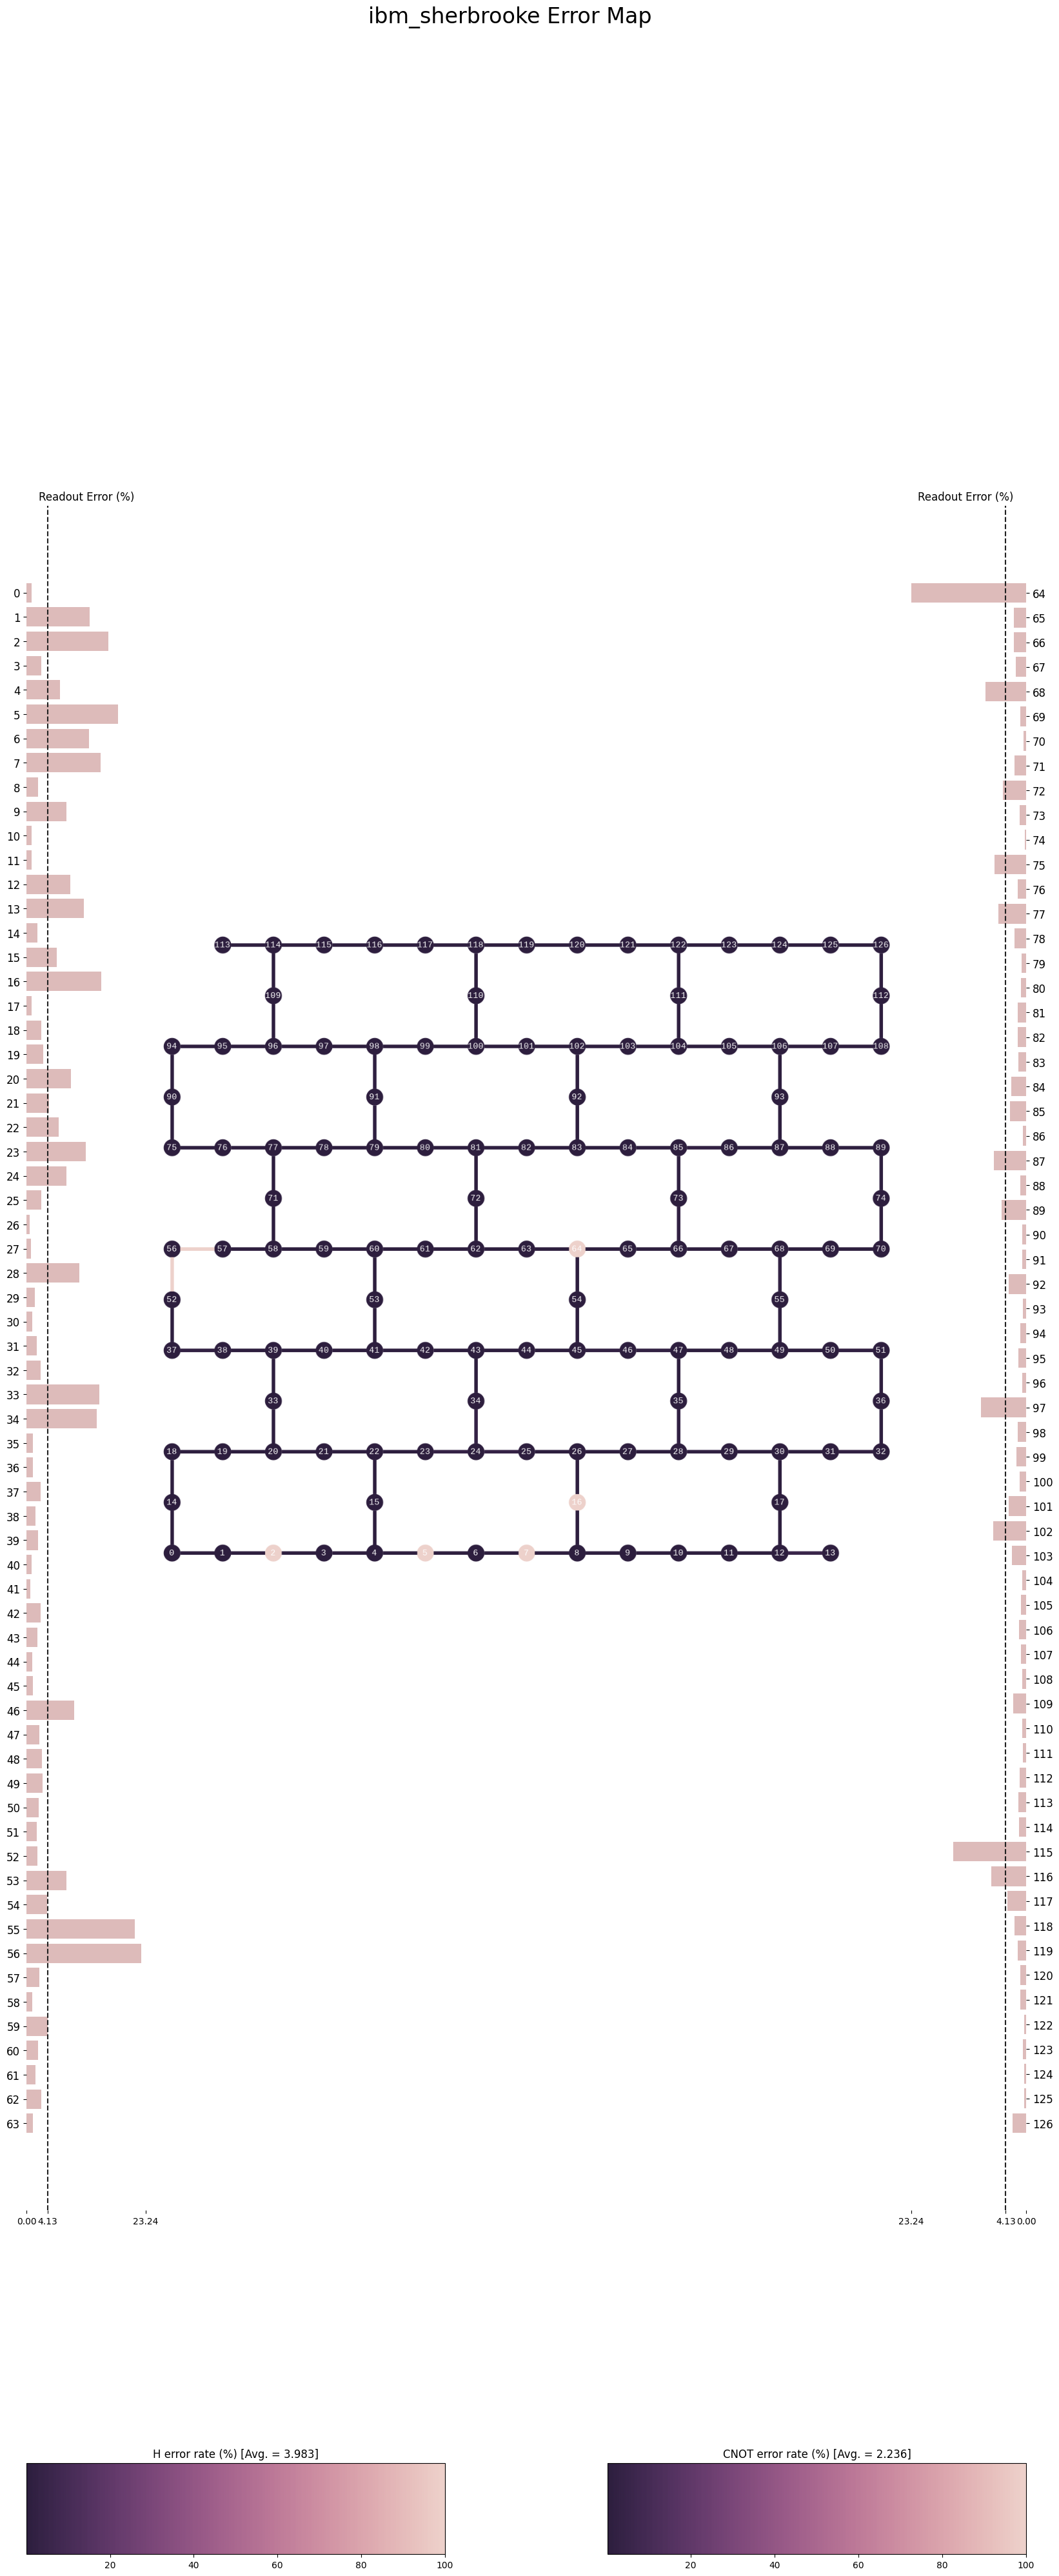

In [ ]:
plot_error_map(backend,figsize=(20, 50))

# **ADDITIONALS**

In [ ]:
# List all backends
all_backends = service.backends(simulator=False)

# Print backend names
for backend in all_backends:
    print(backend.name)

ibm_brisbane
ibm_sherbrooke


In [ ]:
# prop = backend.properties().to_dict()
# config = backend.configuration().to_dict()

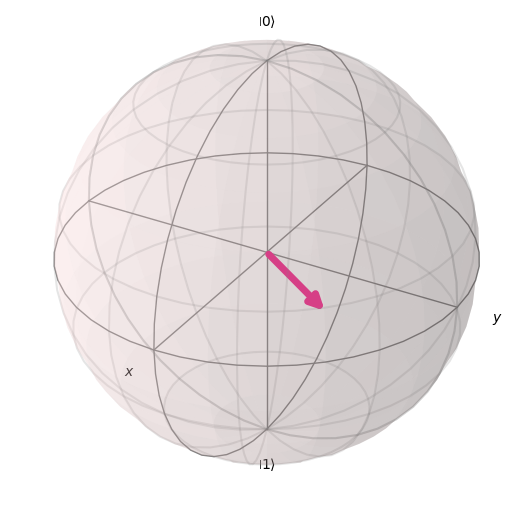

In [ ]:
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([-0.6,0.0,-0.65])

Let's cut to the chase with a crystal-clear differentiation:

---

### 1. **`qiskit.qasm.Qasm` (the Qasm object)**

* **What it is:**
  A **parser and container for raw OpenQASM source code and its parse tree (AST)**.

* **When to use:**
  When you want to **work with raw OpenQASM text**, parse it, inspect or manipulate the source *before* converting to a quantum circuit.

* **Key operations:**

  * Instantiate with OpenQASM code: `Qasm(data=...)`
  * Access raw code: `.data`
  * Parse into circuit: `.parse() -> QuantumCircuit`

* **Use case example:**
  Loading a `.qasm` file as raw text and parsing it programmatically.

---

### 2. **`QuantumCircuit.qasm()` method (the qasm string generator)**

* **What it is:**
  A **method of the `QuantumCircuit` class that returns the OpenQASM string representation** of the circuit.

* **When to use:**
  When you already have a `QuantumCircuit` object and want to **export or get the OpenQASM code** representing that circuit.

* **Key operations:**

  * Get OpenQASM string: `qc.qasm()`
  * Write `.qasm` file: `qc.qasm(filename='file.qasm')`

* **Use case example:**
  After building or modifying a circuit, exporting it to OpenQASM for external use or hardware execution.

---

### TL;DR: Use cases side-by-side

| Purpose                                       | Use this                          |
| --------------------------------------------- | --------------------------------- |
| Parse raw OpenQASM source                     | `qiskit.qasm.Qasm` (Qasm object)  |
| Get circuit from OpenQASM                     | `Qasm.parse()` → `QuantumCircuit` |
| Export QuantumCircuit to OpenQASM string/file | `QuantumCircuit.qasm()` method    |

---

### Visual workflow

```
OpenQASM string/file  -->  Qasm object  --(parse)-->  QuantumCircuit  --(qasm())--> OpenQASM string/file
```

---

If you want a snippet illustrating all of this in action, just say so — I'll shoot it your way.
